This notebook presents an analysis of the survey data, focusing on key questions such as:

1. What is the overall sentiment towards Muslims as of June 2024? The responses are categorized into three options: good, neutral, and bad.

2. How do groups across different religiions, regions, genders, income and educational levels perceive Muslims?

3. In what ways does knowing a Muslim affect an individual's view of them?

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data/muslim_brand_oct_2024.csv")

In [5]:
oct24= df.copy()

In [7]:
oct24= oct24.iloc[1:]

In [8]:
oct24.columns

Index(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'Email Address', 'First Name', 'Last Name', 'Custom Data 1',
       'collector_type_source', 'What is your religion?', 'Unnamed: 11',
       'In the last 7 days, how many muslim people have you talked to?',
       'How do you feel about Muslim people in America?',
       'What is your level of education?', 'Where do you get your news from?',
       'Unnamed: 16',
       'How comfortable do you feel interacting with Muslims in your community?',
       'How often do you hear positive things about Muslims in the media?',
       'In the last 30 days, have you come across any events or activities sponsored by a Muslim person or organization?',
       'Gender', 'Age', 'Major US Region', 'Device', 'Household Income'],
      dtype='object')

In [9]:
oct24.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,collector_type_source,...,Where do you get your news from?,Unnamed: 16,How comfortable do you feel interacting with Muslims in your community?,How often do you hear positive things about Muslims in the media?,"In the last 30 days, have you come across any events or activities sponsored by a Muslim person or organization?",Gender,Age,Major US Region,Device,Household Income
1,1.147024e+11,433019017.0,10/01/2024 05:14:33 PM,10/01/2024 05:15:04 PM,NaN,NaN,NaN,NaN,9ab9ed1f5c9ee2c551aa2ac2eb,smc,...,Facebook,NaN,Very comfortable,Often,Yes,male,30_to_44,pacific,ios_mobile,75000_to_99999
2,1.147024e+11,433019017.0,10/01/2024 05:14:37 PM,10/01/2024 05:15:02 PM,NaN,NaN,NaN,NaN,4f49dd8caed987acd6c3527f29,smc,...,CNN,NaN,Very comfortable,Often,Yes,male,18_to_29,west_south_central,android_mobile,0_to_9999
3,1.147024e+11,433019017.0,10/01/2024 05:14:14 PM,10/01/2024 05:14:40 PM,NaN,NaN,NaN,NaN,53a89bba70140be9c1304f5545,smc,...,FOX News,NaN,Very comfortable,Often,NaN,male,18_to_29,middle_atlantic,android_mobile,100000_to_124999
4,1.147024e+11,433019017.0,10/01/2024 05:13:00 PM,10/01/2024 05:13:56 PM,NaN,NaN,NaN,NaN,e4e83f51511896ae170841e0f7,smc,...,Facebook,NaN,Neutral,I don't know,Not sure,male,30_to_44,east_north_central,android_mobile,50000_to_74999
5,1.147024e+11,433019017.0,10/01/2024 05:02:53 PM,10/01/2024 05:03:49 PM,NaN,NaN,NaN,NaN,d6f07ff5b1c522aa6cdc5d7393,smc,...,Other (please specify),local tv and talk radio,Comfortable,Not often,No,male,45_to_60,east_north_central,android_mobile,50000_to_74999


In [11]:
oct24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 1 to 129
Data columns (total 25 columns):
 #   Column                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                            --------------  -----  
 0   Respondent ID                                                                                                     129 non-null    float64
 1   Collector ID                                                                                                      129 non-null    float64
 2   Start Date                                                                                                        129 non-null    object 
 3   End Date                                                                                                          129 non-null    object 
 4   IP Address                      

In [12]:
oct24= oct24.drop(['Respondent ID', 'Collector ID','Email Address', 'First Name','Last Name','IP Address'], axis=1)

In [13]:
oct24.rename(columns={'Unnamed: 11': 'Religion_other'}, inplace=True)
oct24.rename(columns={'Unnamed: 16': 'News_other'}, inplace=True)

In [14]:
oct24.columns

Index(['Start Date', 'End Date', 'Custom Data 1', 'collector_type_source',
       'What is your religion?', 'Religion_other',
       'In the last 7 days, how many muslim people have you talked to?',
       'How do you feel about Muslim people in America?',
       'What is your level of education?', 'Where do you get your news from?',
       'News_other',
       'How comfortable do you feel interacting with Muslims in your community?',
       'How often do you hear positive things about Muslims in the media?',
       'In the last 30 days, have you come across any events or activities sponsored by a Muslim person or organization?',
       'Gender', 'Age', 'Major US Region', 'Device', 'Household Income'],
      dtype='object')

# 1. Distribution of Religious Affiliations Amongst Participants

### Metric 1: Sentiment Proportion

In [16]:
c_df = oct24['How do you feel about Muslim people in America?'].value_counts(normalize=True).reset_index()
c_df.columns = ['Category', 'Percentage']
c_df['Percentage'] *= 100  

In [17]:
print( "Good sentiment:", c_df.loc[0,'Percentage'])
print( "Neutral sentiment:", c_df.loc[1,'Percentage'])
print( "Bad sentiment:", c_df.loc[2,'Percentage'])

Good sentiment: 59.68992248062015
Neutral sentiment: 33.33333333333333
Bad sentiment: 6.976744186046512


In [18]:
ratio = oct24['How do you feel about Muslim people in America?'].value_counts().reset_index()
positive_to_negative_ratio = ratio.loc[0,'How do you feel about Muslim people in America?']/\
ratio.loc[2,'How do you feel about Muslim people in America?']

In [19]:
positive_to_negative_ratio

8.555555555555555

In [31]:
def plot_percentages(df, column_name, x_label, title):
    """
    Creates a bar plot of the percentage distribution of categories in a column.
    Highlights the largest percentage in red and the rest in grey.
    """
    
    counts_df = df[column_name].value_counts(normalize=True).reset_index()
    counts_df.columns = ['Category', 'Percentage']
    counts_df['Percentage'] *= 100  

    max_index = counts_df['Percentage'].idxmax()
    colors = ['grey' if i != max_index else 'red' for i in range(len(counts_df))]

 
    plt.figure(figsize=(9, 5), dpi=150)
    sns.barplot(x='Category', y='Percentage', data=counts_df, palette=colors)


    plt.title(title, fontsize=12)
    plt.xlabel(x_label, fontsize=10)
    plt.ylabel('Percentage', fontsize=10)
    plt.xticks(rotation=45, ha='right')  

    plt.show()

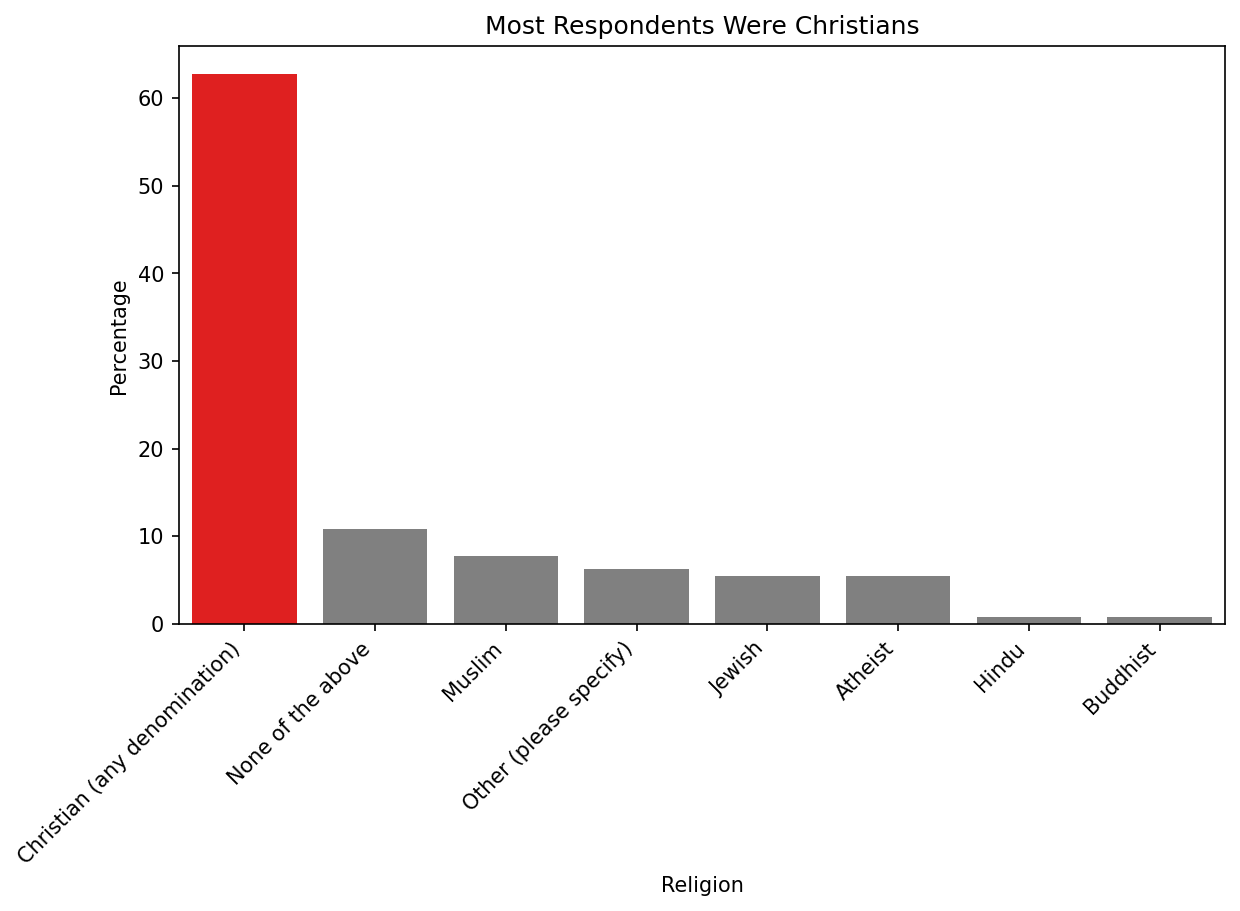

In [32]:
plot_percentages(oct24,'What is your religion?', 'Religion', 'Most Respondents Were Christians')

# 2. Distribution of Sentiments Across All Participants

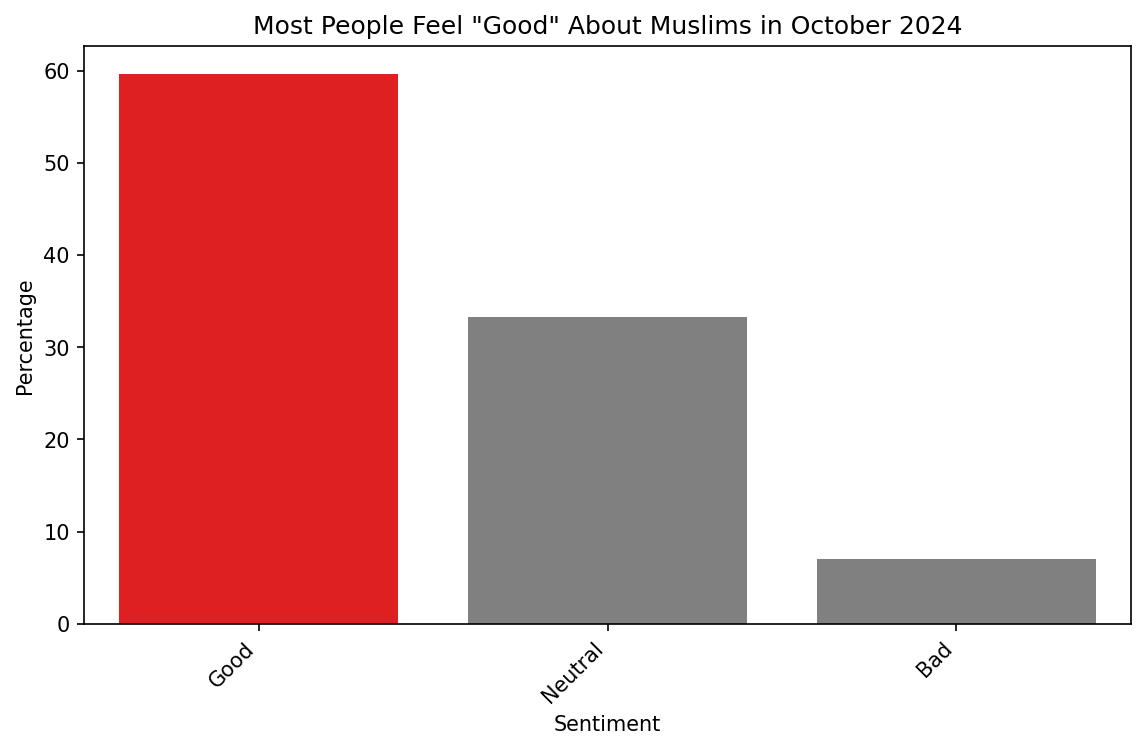

In [33]:
plot_percentages(oct24,'How do you feel about Muslim people in America?', 'Sentiment', \
                 'Most People Feel "Good" About Muslims in October 2024')

# 3. How Different Religious Groups View Muslims

In [34]:
def plot_stacked_bar_chart(df, title, xlabel, ylabel, cat_col, sent_col, legend_title='View'):
    """
    Plots a stacked bar chart with percentages based on the grouping of two columns, 
    one for categories (e.g., education or religion)
    and the other for sentiments.
    """
    
    colors = {
        'Good': '#8ccc87',
        'Bad': '#ba3e2b',
        'Neutral':'#d1cfcf'
    }
    
    grouped = df.groupby([cat_col, sent_col]).size().unstack(fill_value=0)
    
    grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

    ax = grouped_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), \
                                 color=[colors[col] for col in grouped_percentage.columns])
    # Add percentage annotations
    for i, (colname, coldata) in enumerate(grouped_percentage.items()):
        for index, value in enumerate(coldata):
            if value > 0:  # Only annotate non-zero segments
                ax.text(index, 
                        grouped_percentage.iloc[:index+1, :i+1].sum(axis=1)[index] - (value / 2), 
                        # Position the text in the center of the segment
                        f"{value:.1f}%", 
                        ha='center', 
                        va='center', 
                        color='white' if colors[colname] == 'grey' else 'black', 
                        # Adjust text color for readability
                        fontsize=9)


    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(rotation=45, ha='right')

    # Position the legend outside the plot
    plt.legend(title=legend_title, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

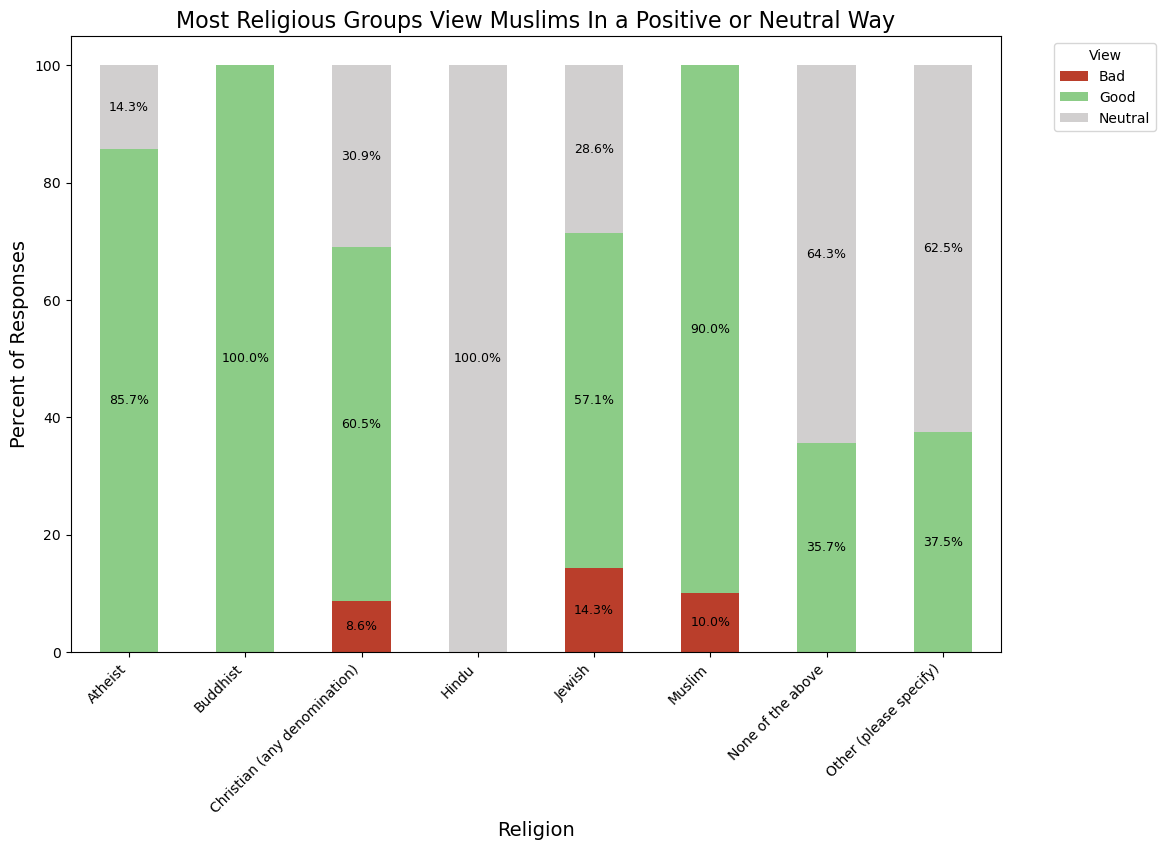

In [35]:
plot_stacked_bar_chart(
    df=oct24,  
    title='Most Religious Groups View Muslims In a Positive or Neutral Way',
    xlabel='Religion',
    ylabel='Percent of Responses',
    cat_col='What is your religion?',
    sent_col='How do you feel about Muslim people in America?',
)

In [36]:
oct24[oct24['What is your religion?']=='Other (please specify)']['Religion_other'].value_counts()

catholic       3
Catholic       3
The            1
Pastafarian    1
Name: Religion_other, dtype: int64

## Observation 1: Majority Positive or Neutral Perceptions Across Religious Backgrounds

Most religious groups have a majority of responses falling under "Good" or "Neutral." This observation supports a general positive or neutral perception among various religious groups. 
However, some groups (e.g., "Jewish", 'Muslim", and "Christian") show noticeable proportions of "Bad" responses, with Jewish respondents having the highest proportion of negative views (14.3% of Jewish people feel negatively about Muslims)

It is also interesting that 100% of Hindus feel neutral about Muslims, which was not the case in the data presented in June 2024


# 4. How Different Educational Backgrouds View Muslims

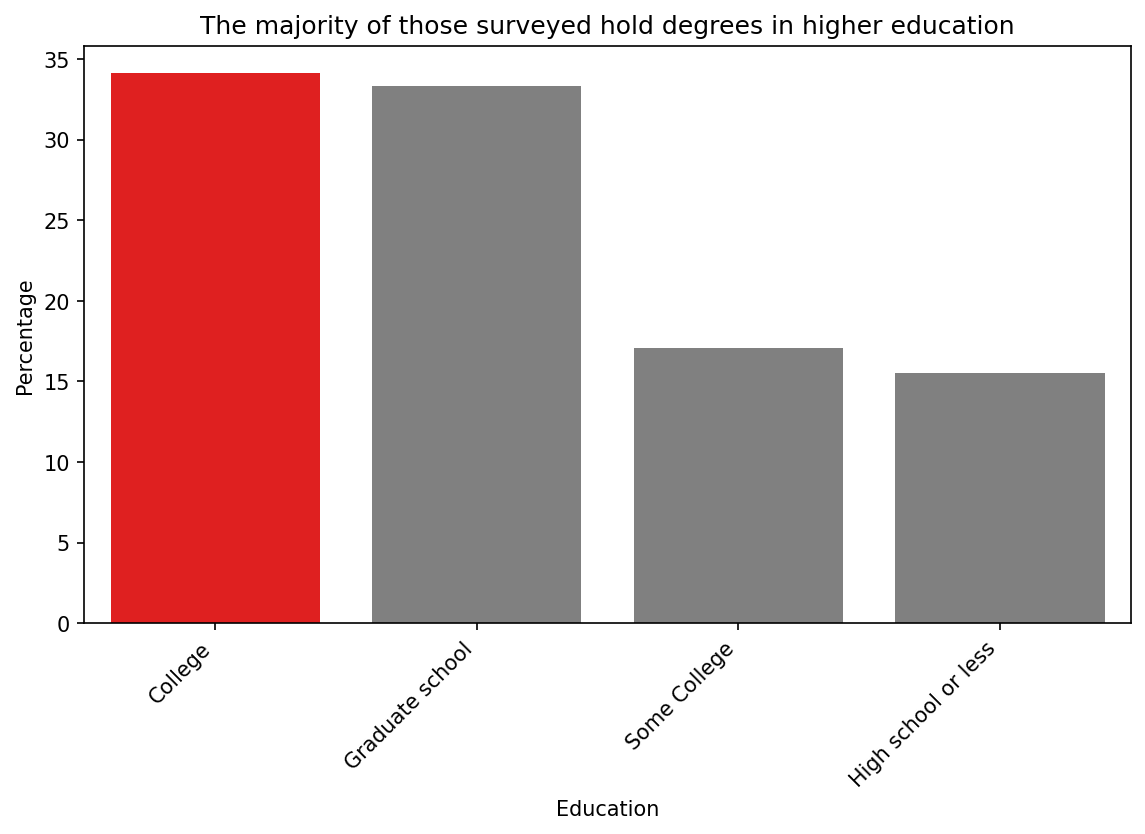

In [37]:
plot_percentages(oct24,'What is your level of education?', 'Education',
           'The majority of those surveyed hold degrees in higher education')

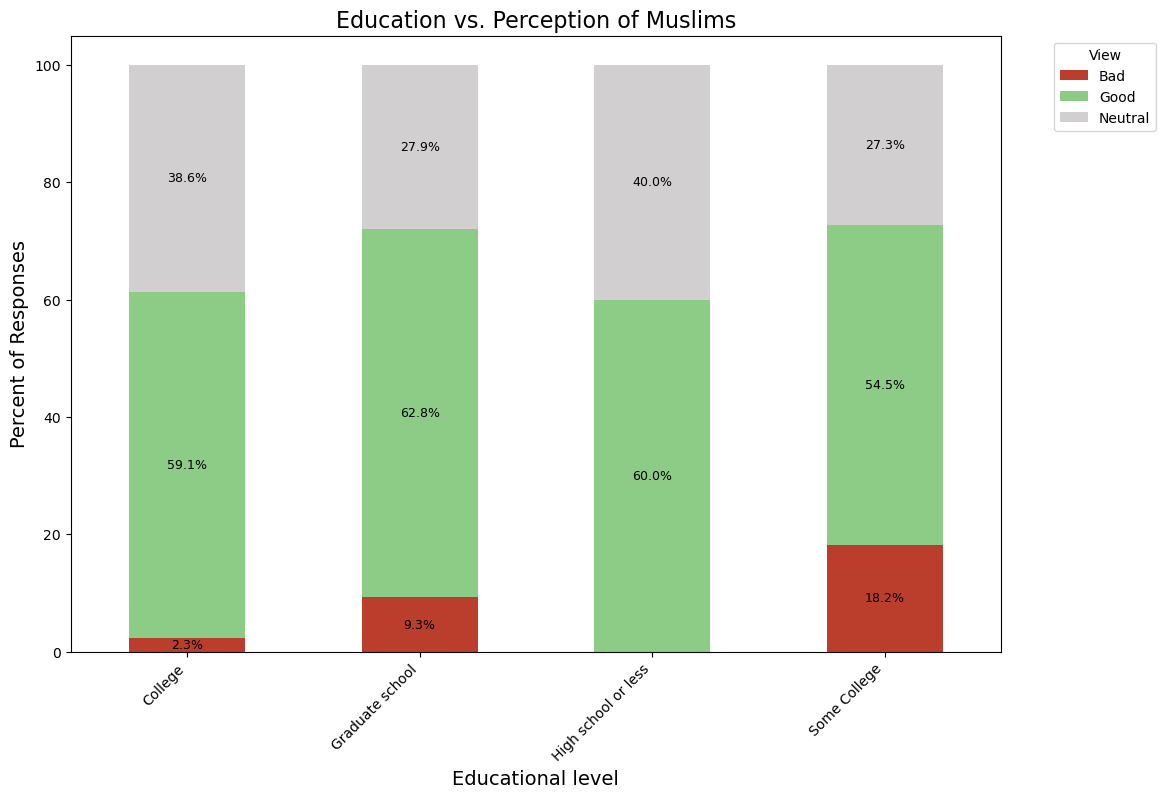

In [38]:
plot_stacked_bar_chart(
    df=oct24, 
    title='Education vs. Perception of Muslims',
    xlabel='Educational level',
    ylabel='Percent of Responses',
    cat_col='What is your level of education?',
    sent_col='How do you feel about Muslim people in America?'
)

## Observation 2: Majority Positive or Neutral Perceptions Across Educational Levels

The highest percentage of "Neutral" responses is found among those with only a college degree (38.6%) and those with a high school education or less (40.0%).
In contrast, individuals with graduate school education and those with some college education show slightly lower "Neutral" responses, with 27.9% and 27.3%, respectively.


The lowest percentage of "Bad" responses is among those with a college degree (2.3%).Graduate school respondents have a slightly higher rate of "Bad" responses at 9.3%. Interestingly, those with some college education display the highest percentage of "Bad" responses at 18.2%, suggesting a possible correlation between partial college education and higher negative perceptions.

Graduate school respondents have the highest percentage of "Good" responses at 62.8%, closely followed by individuals with a high school education or less at 60.0%.
This could imply that both the highly educated and those with basic education levels have more favorable views than those with intermediate education levels (some college).

# 5. How Do Different Age Groups View Muslims

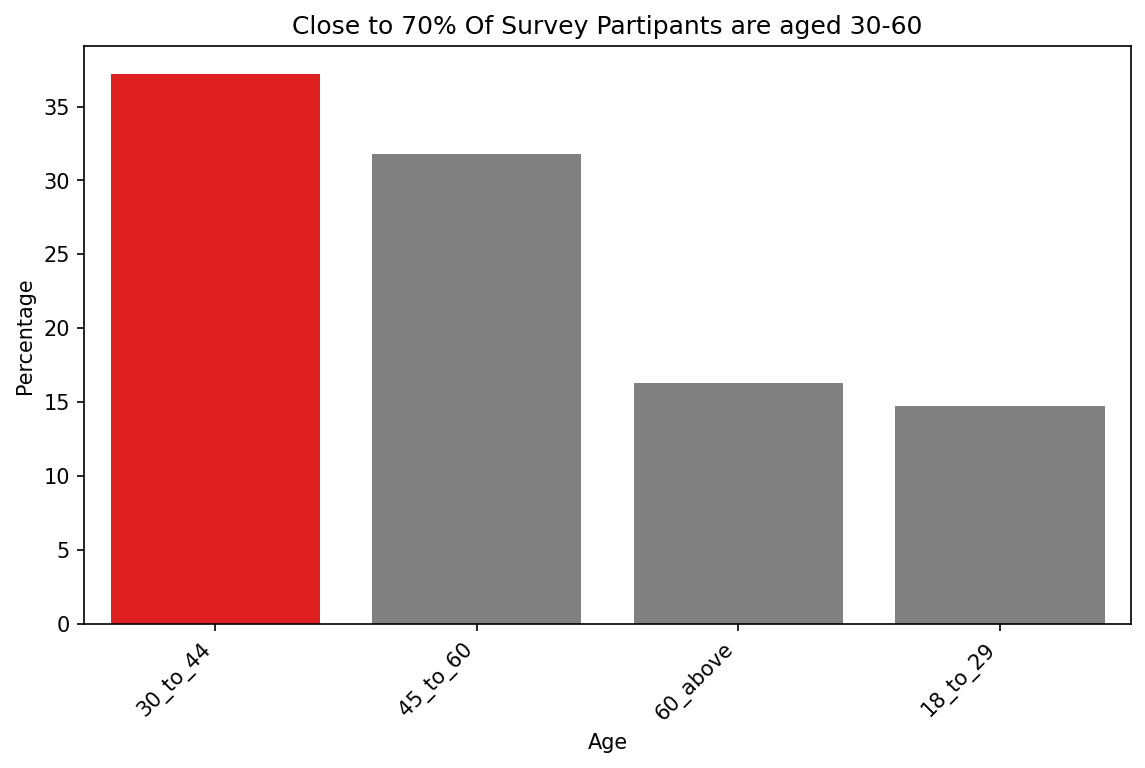

In [41]:
plot_percentages(oct24,'Age', 'Age',
           'Close to 70% Of Survey Partipants are aged 30-60')

This distribution suggests that the survey results may be more reflective of perspectives or experiences common to people aged 30 to 60, especially those in the 30 to 44 range.

The lower representation of younger (18 to 29) and older (60+) participants might mean that any insights drawn from this survey could be less generalizable to these age groups.

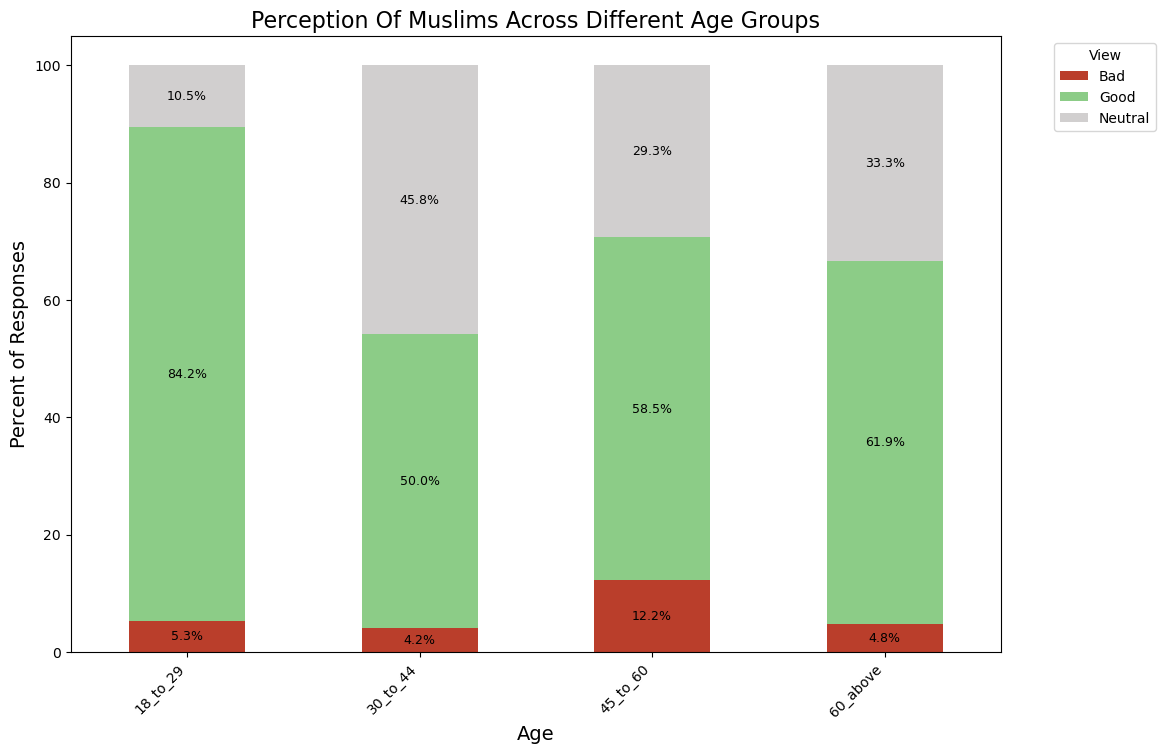

In [44]:
plot_stacked_bar_chart(
    df=oct24, 
    title='Perception Of Muslims Across Different Age Groups',
    xlabel='Age',
    ylabel='Percent of Responses',
    cat_col='Age',
    sent_col='How do you feel about Muslim people in America?'
)

## Observation 3: Strong Positive Sentiment Among Younger Respondents

The age group 18 to 29 has the highest percentage of "Good" responses at 84.2%, indicating a very positive perception of Muslims among younger adults.This group also has the lowest percentage of "Neutral" responses (10.5%) and a minimal amount of "Bad" responses (5.3%), further reinforcing the strong positive sentiment.

Ages 30 to 44: This age group shows a fairly balanced distribution with 50% "Good" and 45.8% "Neutral." Only 4.2% reported "Bad" responses, suggesting a generally positive but somewhat mixed sentiment.

Ages 45 to 60: This group displays a decrease in positive sentiment (58.5% "Good") and a notable increase in "Bad" responses at 12.2%, the highest across all age groups. The "Neutral" responses (29.3%) suggest a more divided perspective within this age range.

# 6. How Do Different Income Groups View Muslims

In [45]:
oct24['Household Income'].value_counts()

50000_to_74999      25
25000_to_49999      25
100000_to_124999    14
0_to_9999           11
75000_to_99999       9
150000_to_174999     9
200000_and_up        9
10000_to_24999       8
175000_to_199999     7
125000_to_149999     7
no_answer            5
Name: Household Income, dtype: int64

In [54]:
income_mapping = {
    "50000_to_74999":  "50k-75k",
    "25000_to_49999":  "25k_50k",
    "100000_to_124999": "100k-125k",
    "0_to_9999": "0-9k",
    "75000_to_99999": "75k_100k",
    "150000_to_174999": "150k_175k",
    "200000_and_up": "200k_up",
    "10000_to_24999": "10k-25k",
    "175000_to_199999" :"175k_200k",
    "125000_to_149999": "125k-150k",
   "no_answer": "undisclosed"
}

oct24['Household Income'] = oct24['Household Income'].replace(income_mapping)

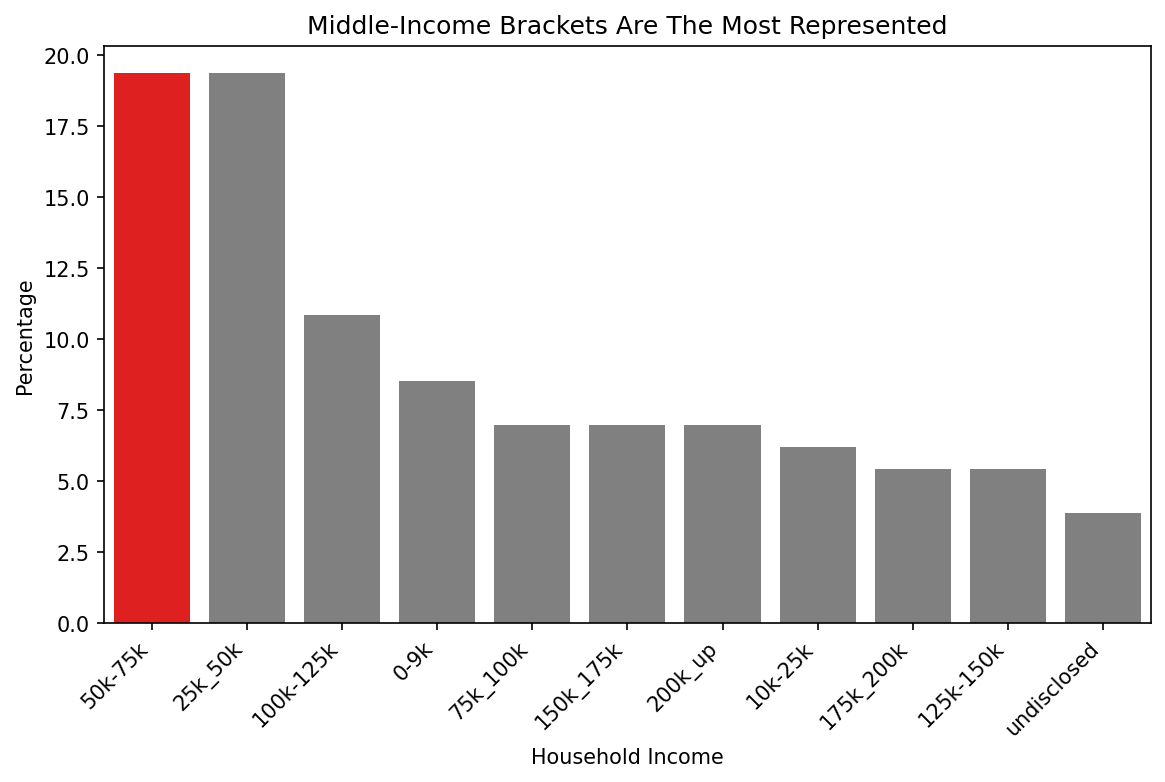

In [55]:
plot_percentages(oct24,'Household Income', 'Household Income',
           'Middle-Income Brackets Are The Most Represented')

The survey primarily reflects the views of respondents in middle-income brackets (25k to 75k).
Lower representation from both the lowest and highest income groups could mean that the survey findings may be more reflective of middle-income experiences or perspectives, with less input from the extremes of the income spectrum.

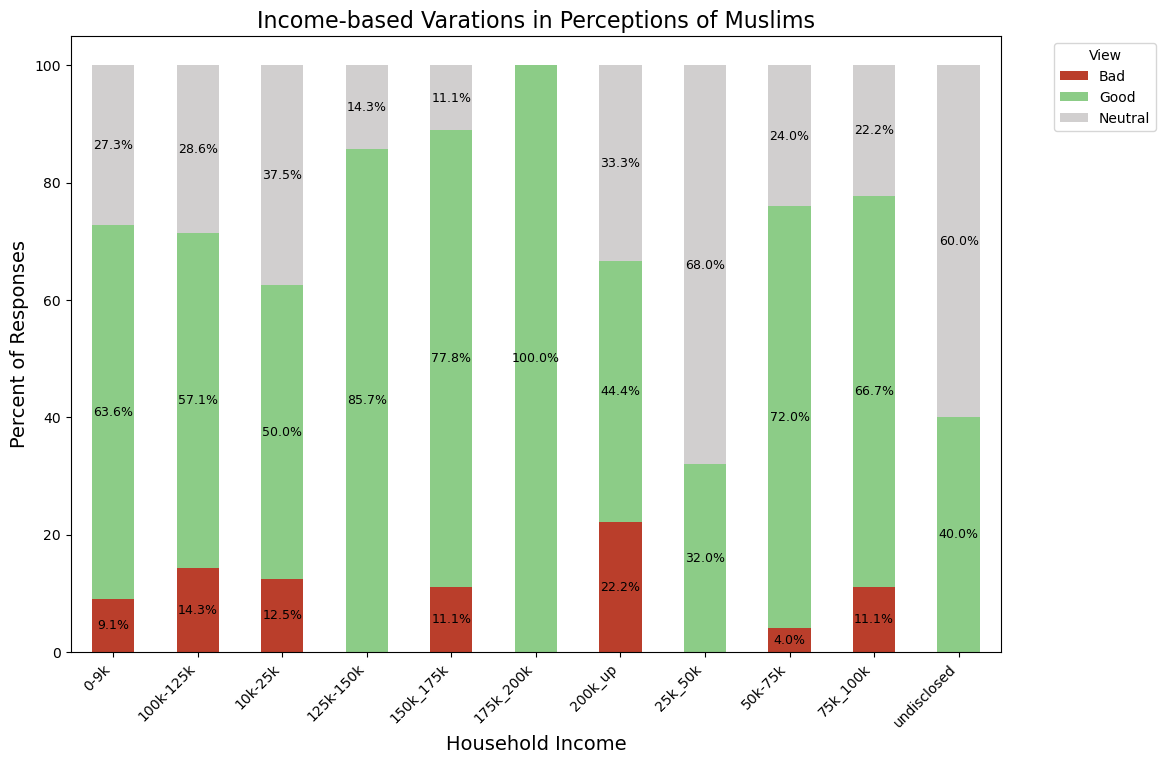

In [56]:
plot_stacked_bar_chart(
    df=oct24, 
    title='Income-based Varations in Perceptions of Muslims',
    xlabel='Household Income',
    ylabel='Percent of Responses',
    cat_col='Household Income',
    sent_col='How do you feel about Muslim people in America?'
)

## Observation 4: 

The 200k and up income bracket has the highest proportion of "Bad" responses at 22.2 percent, which is notably higher than other income groups. 175k-200k has the highest proprotion of positive responses at 100 % 

Other groups with visible levels of "Bad" responses include 100k to 125k (14.3 %) and 75k- 100k (11.1%).
The 25k to 50k bracket has the highest proprotion of neutral views

# 7. How Do Different Regions View Muslims

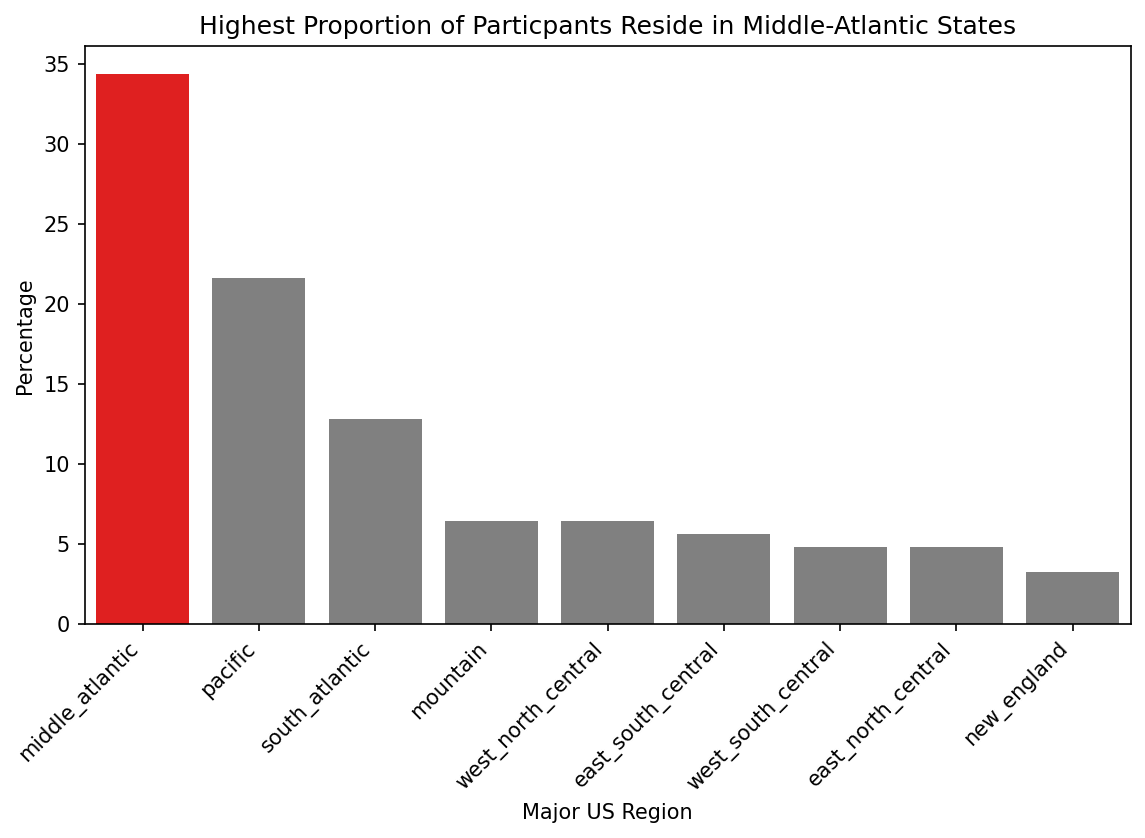

In [57]:
plot_percentages(oct24,'Major US Region', 'Major US Region',
                 'Highest Proportion of Particpants Reside in Middle-Atlantic States')

**Middle-Atlantic**: Its exact definition differs by source, but the region typically includes New Jersey, Maryland, Virginia, Delaware, West Virginia, District of Columbia, and Pennsylvania (sometimes New York)

**South-Atlantic**: Kentucky, North Carolina, South Carolina, Tennessee

**Pacific**: Alaska, California, Hawaii, Oregon, and Washington

**West-South-Central**:Arkansas, Louisiana, Oklahoma, and Texas

**West-North-Central**: Iowa, Missouri, Nebraska, North Dakota, South Dakota, Minnesota and Kansas

**Mountain**: Arizona, Colorado, Idaho, Montana, Nevada, New Mexico, Utah, and Wyoming

**East-North-Central**: Illinois, Indiana, Michigan, Ohio, Wisconsin 

**East-South:-Central**: Alabama, Kentucky, Mississippi, and Tennessee


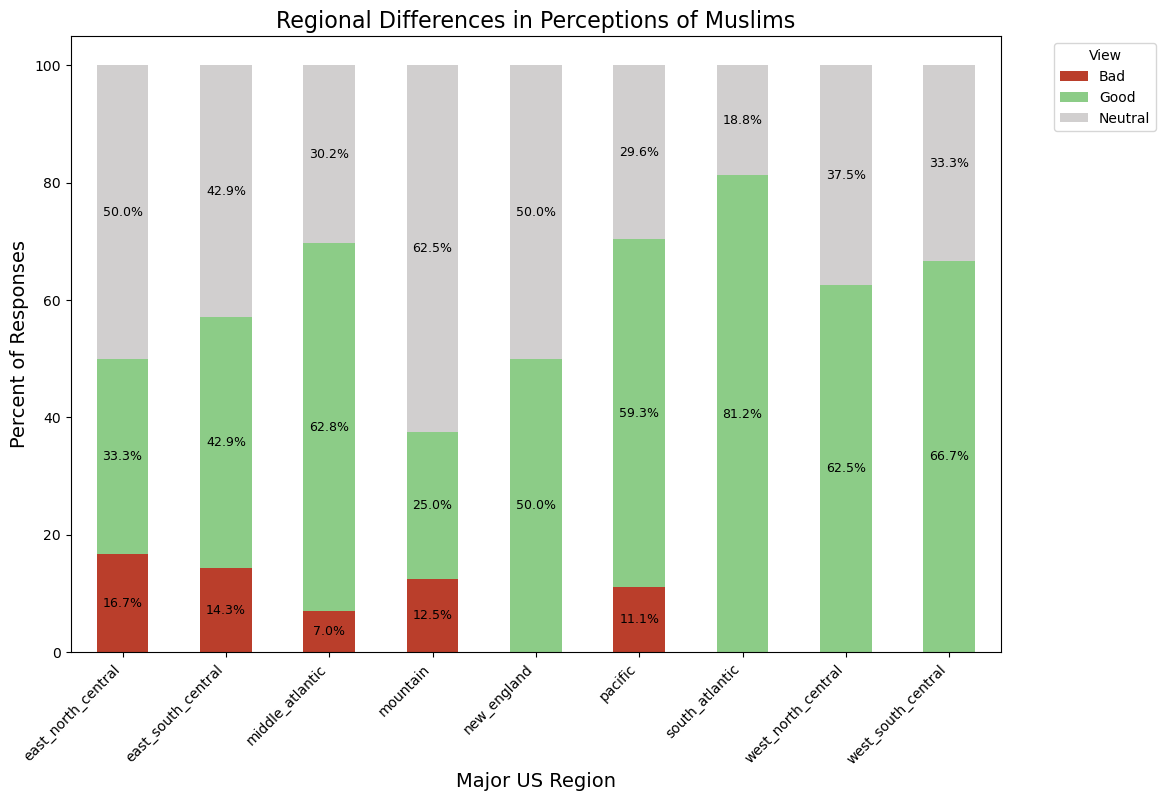

In [60]:
plot_stacked_bar_chart(
    df=oct24, 
    title='Regional Differences in Perceptions of Muslims',
    xlabel='Major US Region',
    ylabel='Percent of Responses',
    cat_col='Major US Region',
    sent_col='How do you feel about Muslim people in America?'
)

## Observation 5:

The East North Central region reports the highest proportion of "Bad" responses at 16.7%, followed by the East South Central region at 14.3%. 

The New England region has a more evenly distributed sentiment, with 50% "Good" and 50% "Neutral" responses, showing a balance between positive and neutral views.

The South Atlantic region stands out, with 81.2% of respondents expressing a "Good" perception, the highest among all regions.
The Pacific region also has a significant proportion of "Good" responses at 59.3%, demonstrating positive sentiment.

In [61]:
oct24.columns

Index(['Start Date', 'End Date', 'Custom Data 1', 'collector_type_source',
       'What is your religion?', 'Religion_other',
       'In the last 7 days, how many muslim people have you talked to?',
       'How do you feel about Muslim people in America?',
       'What is your level of education?', 'Where do you get your news from?',
       'News_other',
       'How comfortable do you feel interacting with Muslims in your community?',
       'How often do you hear positive things about Muslims in the media?',
       'In the last 30 days, have you come across any events or activities sponsored by a Muslim person or organization?',
       'Gender', 'Age', 'Major US Region', 'Device', 'Household Income'],
      dtype='object')

# 5. Relationship between knowing a Muslim and Sentiment

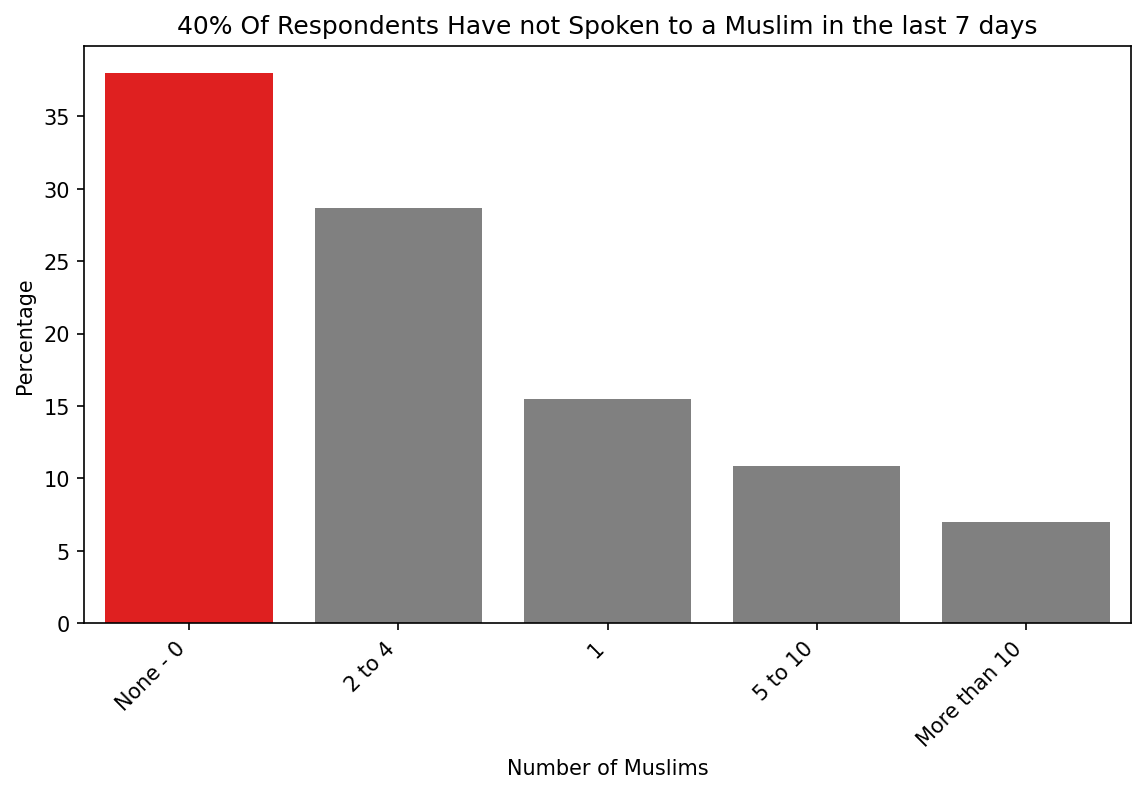

In [63]:
plot_percentages(oct24,'In the last 7 days, how many muslim people have you talked to?', 'Number of Muslims',\
           '40% Of Respondents Have not Spoken to a Muslim in the last 7 days')

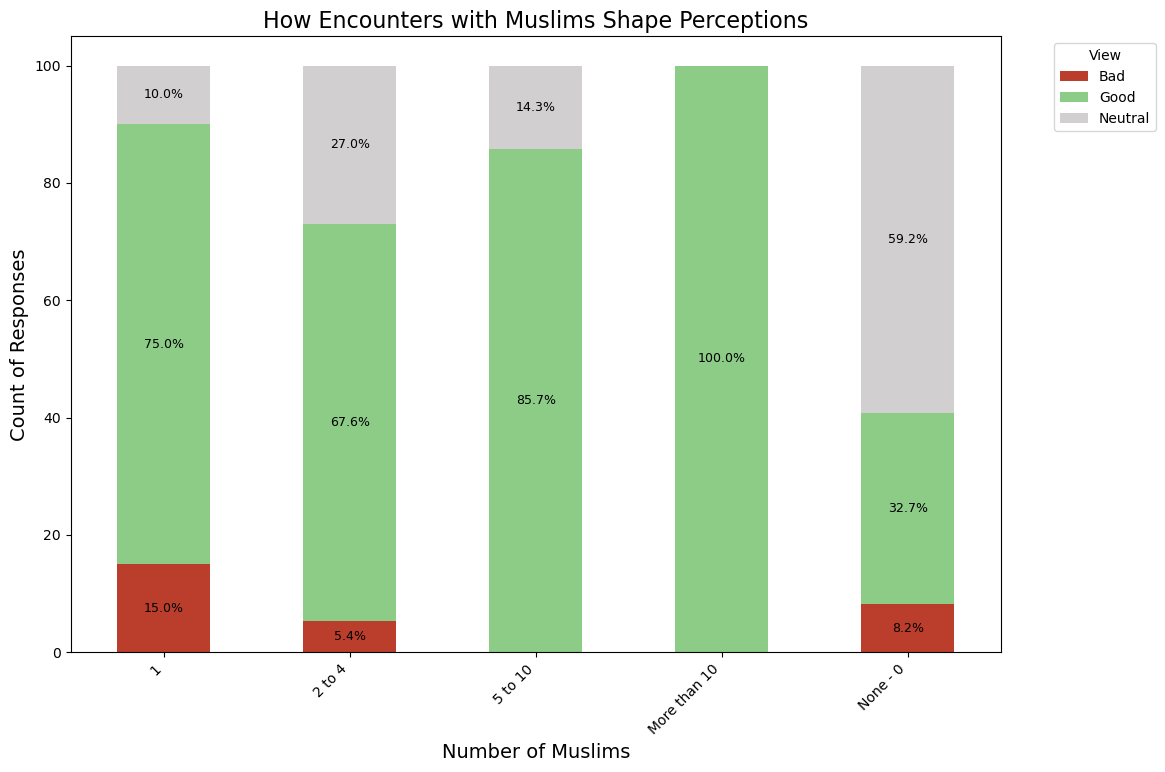

In [64]:
plot_stacked_bar_chart(
    df=oct24, 
    title='How Encounters with Muslims Shape Perceptions',
    xlabel='Number of Muslims',
    ylabel='Count of Responses',
    cat_col='In the last 7 days, how many muslim people have you talked to?',
    sent_col='How do you feel about Muslim people in America?'
)

## Observation 6

Strong Positive Correlation with Increased Encounters:

Respondents who interacted with more than 10 Muslims reported 100% positive ("Good") sentiment, suggesting a strong correlation between frequent interactions and positive perceptions.
Similarly, those with 5 to 10 interactions show a high "Good" sentiment (85.7%), which supports the idea that increased contact fosters favorable views.

Among respondents who interacted with only 1 Muslim, 75% reported a positive sentiment, but 15% also expressed a "Bad" view, which is the highest proportion of negative sentiment among all groups.

For those with 2 to 4 interactions, 67.6% felt "Good," but 5.4% held a "Bad" perception, indicating a slightly more mixed view than those with more frequent interactions.


Respondents who reported no interactions with Muslims had a higher proportion of "Neutral" responses (59.2%), with a smaller percentage expressing positive (32.7%) or negative (8.2%) sentiments.

This pattern suggests that the absence of interaction may lead to more neutral perceptions, potentially due to lack of personal experience

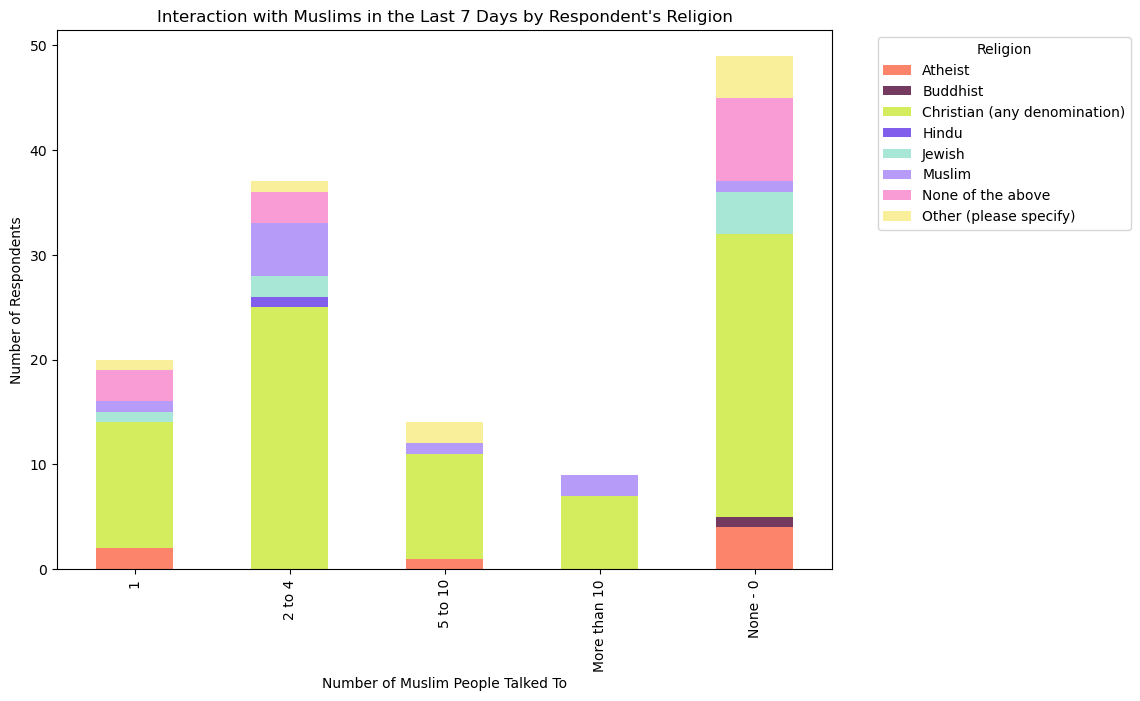

In [88]:
counts = oct24.groupby(['In the last 7 days, how many muslim people have you talked to?', \
                        'What is your religion?']).size().unstack()

counts.plot(kind='bar', stacked=True, figsize=(10, 7), color = ['#fb846b','#743a60','#d3ed5e',\
                                                                '#825eed','#a8e6d5','#b69bf9','#f99bd5','#f9ef9b'])


plt.title("Interaction with Muslims in the Last 7 Days by Respondent's Religion")
plt.xlabel("Number of Muslim People Talked To")
plt.ylabel("Number of Respondents")

plt.legend(title="Religion", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [89]:
oct24['interaction_group'] = oct24['In the last 7 days, how many muslim people have you talked to?'].\
apply(lambda x: 'Had interactions' if x != 'None - 0' else 'No interactions')

In [90]:
grouped = oct24.groupby(['interaction_group', 'How do you feel about Muslim people in America?']).\
size().reset_index(name='count')

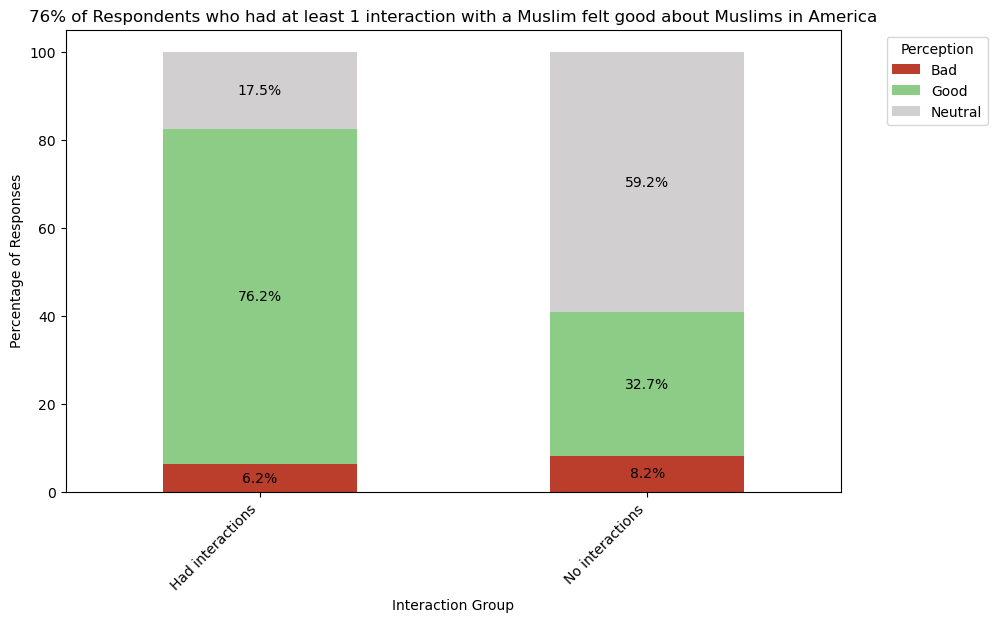

In [93]:
totals = grouped.groupby('interaction_group')['count'].transform('sum')
grouped['percentage'] = (grouped['count'] / totals) * 100

pivot_table = grouped.pivot(index='interaction_group', 
                            columns='How do you feel about Muslim people in America?', 
                            values='percentage').fillna(0)


colors = ['#ba3e2b', '#8ccc87','#d1cfcf']  


ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)


plt.title('76% of Respondents who had at least 1 interaction with a Muslim felt good about Muslims in America')
plt.xlabel('Interaction Group')
plt.ylabel('Percentage of Responses')


for i, interaction_group in enumerate(pivot_table.index):
    cumulative_percentage = 0  
    for j, sentiment in enumerate(pivot_table.columns):
        percentage = pivot_table.loc[interaction_group, sentiment]
        if percentage > 0:
            ax.text(
                i, cumulative_percentage + (percentage / 2),  
                f"{percentage:.1f}%", 
                ha='center', va='center', color='black', fontsize=10
            )
            cumulative_percentage += percentage  
plt.xticks(rotation=45, ha='right')

plt.legend(title='Perception', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



## Observation 7

There is a higher positive perception with interaction. Among respondents who had interactions with Muslims, 76.2% felt good about Muslims in America, compared to only 32.7% among those with no interactions. This suggests a strong association between personal interaction and positive perception.


In the "No interactions" group, 59.2% felt neutral about Muslims, significantly higher than the 17.5% neutral perception among those who had interactions.
Similarly, the "No interactions" group had a slightly higher percentage of negative perception (8.2%) compared to those who had interactions (6.2%).

# 6. Relationship Between Primary News Sources and Public Sentiment

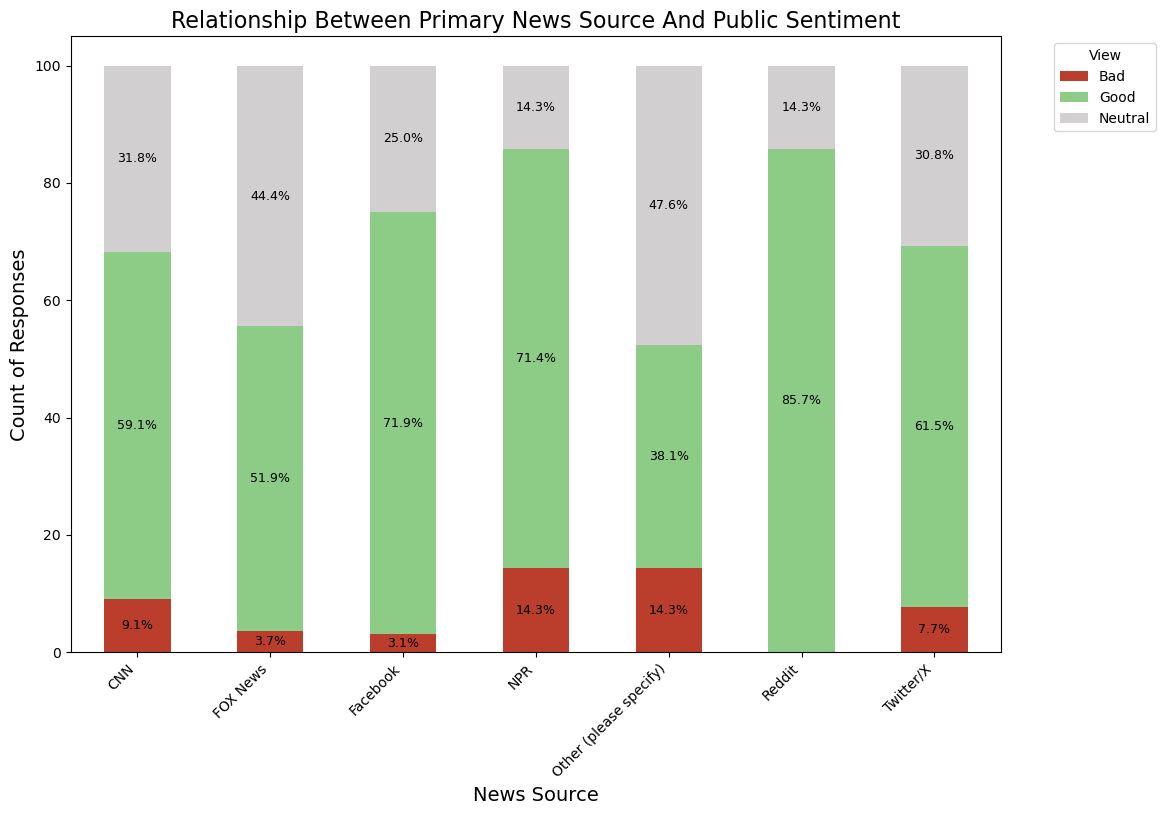

In [94]:
plot_stacked_bar_chart(
    df=oct24, 
    title='Relationship Between Primary News Source And Public Sentiment',
    xlabel='News Source',
    ylabel='Count of Responses',
    cat_col= 'Where do you get your news from?',
    sent_col='How do you feel about Muslim people in America?'
)

In [50]:
survey[survey['Where do you get your news from?']== 'Other (please specify)']['News_other']

8                                   apple and yahoo news
15                                I don’t watch any news
21                                            Local news
42                                               Tik tok
62                                                    Hi
63                                cbs local news-morning
72           Local news, national television affiliates 
73                                      Multiple sources
80                                               YouTube
82                                  radio, news webpages
87                                       Aggregated news
89                                                    ok
90                                            local news
93     My MOMM as she is a News 📰 🗞️ junkie and tells...
103           Rarely listen to the news; talk to friends
105                                             ABC News
Name: News_other, dtype: object

## Observation 8


Twitter users report the highest proportion of "Good" responses at 91.3%, followed by NPR users at 80%.
This indicates that respondents who primarily get their news from Twitter and NPR tend to have more positive perceptions.

Facebook users report 78.1% "Good" responses, which, while high, is lower than the positive sentiment reported by Twitter and NPR users.
This places Facebook in a middle position among the sources, leaning positive but not as strongly as Twitter or NPR.

CNN and Fox News have higher proportions of "Neutral" responses, at 40% and 53.8%, respectively.
This suggests that viewers of these traditional news sources are more likely to hold neutral views.

Negative sentiment remains low across all sources, with slightly higher "Bad" responses for Fox News (7.7%) and Other (News from friends and family, local news, youtube Tik Tok, Apple and Yahoo News) (6.2%), though the numbers are generally minimal.

**Conclusion**:

The data suggests that primary news sources are associated with differing perceptions of Muslims. 
Twitter users show the highest level of positive sentiment, with 91.3% of responses marked as 'Good,' followed closely by NPR users at 80%. Facebook users also exhibit a predominantly positive view, though to a slightly lesser degree (78.1%). Traditional news sources like CNN and Fox News tend to yield more neutral responses, with Fox News also showing a slightly elevated level of negative sentiment

# 7. Relationship between Gender and Sentiment

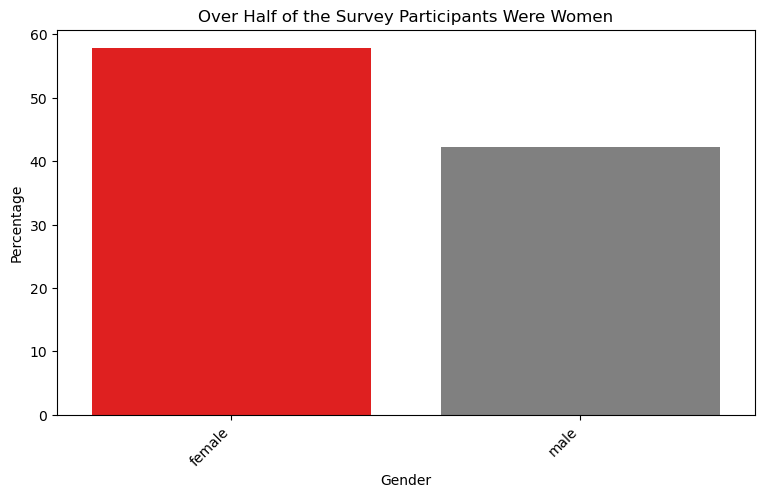

In [54]:
plot_percentages(survey,'Gender', 'Gender',
           'Over Half of the Survey Participants Were Women')

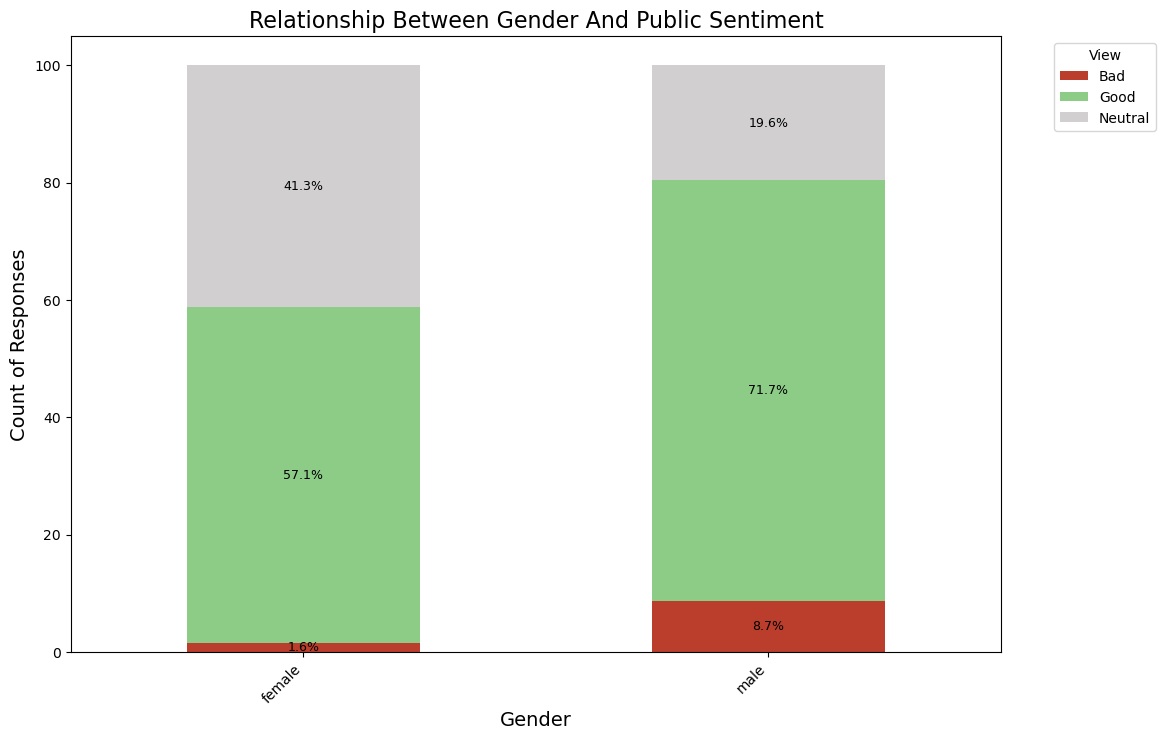

In [57]:
plot_stacked_bar_chart(
    df=survey, 
    title='Relationship Between Gender And Public Sentiment',
    xlabel='Gender',
    ylabel='Count of Responses',
    cat_col= 'Gender',
    sent_col='How do you feel about Muslims people in America'
)

## Observation 9

The data suggests that men are more likely to hold positive views of Muslims, with 71.7% of male respondents indicating a 'Good' perception, compared to 57.1% of female respondents. Women, however, are more likely to remain neutral, with 41.3% expressing a 'Neutral' view. Negative sentiment remains low among both genders, with higher proportions among men

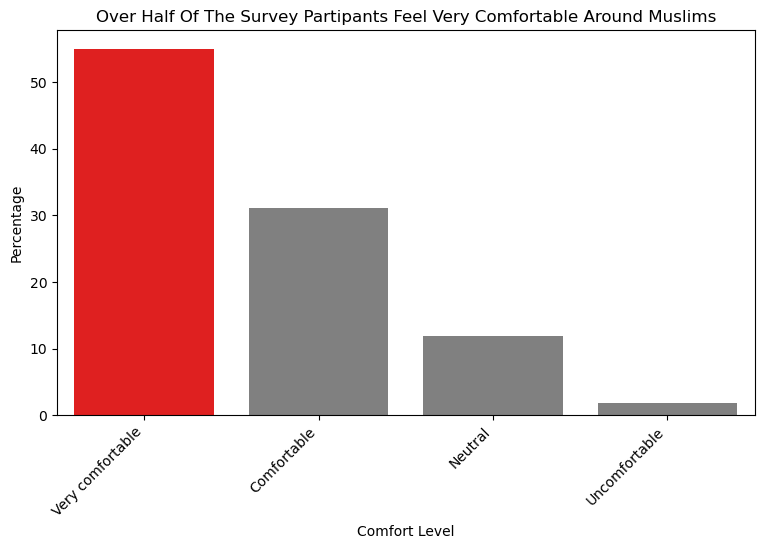

In [62]:
plot_percentages(survey, 'How comfortable do you feel interacting with Muslims in your community?', \
                 'Comfort Level', 'Over Half Of The Survey Partipants Feel Very Comfortable Around Muslims')

In [78]:
def plot_bar (df, category_col, comfort_level, title, xlabel, ylabel):   
    grouped = df.groupby([category_col, comfort_level]).size().reset_index(name='count')


    totals = grouped.groupby(category_col)['count'].transform('sum')
    grouped['percentage'] = (grouped['count'] / totals) * 100

    pivot_table = grouped.pivot(index=category_col, columns=comfort_level, values='percentage').fillna(0)

    comfort_colors = {
        'Very comfortable': '#17b50e',  
        'Comfortable': '#9be897',       
        'Neutral': '#e3e1e1',           
        'Uncomfortable': '#cf4229',     
        'Very uncomfortable': '#2ebf26'  
    }



    ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), \
                          color=[comfort_colors.get(level) for level in pivot_table.columns])


    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Comfort Level', bbox_to_anchor=(1.05, 1), loc='upper left')


    for i, religion in enumerate(pivot_table.index):
        cumulative_percentage = 0
        for level in pivot_table.columns:
            percentage = pivot_table.loc[religion, level]
            if percentage > 0:
                ax.text(
                    i, cumulative_percentage + (percentage / 2),  # Position in the middle of each segment
                    f"{percentage:.1f}%", 
                    ha='center', va='center', color='white' if level == 'Very comfortable' else 'black', fontsize=9
                )
                cumulative_percentage += percentage

    plt.show()

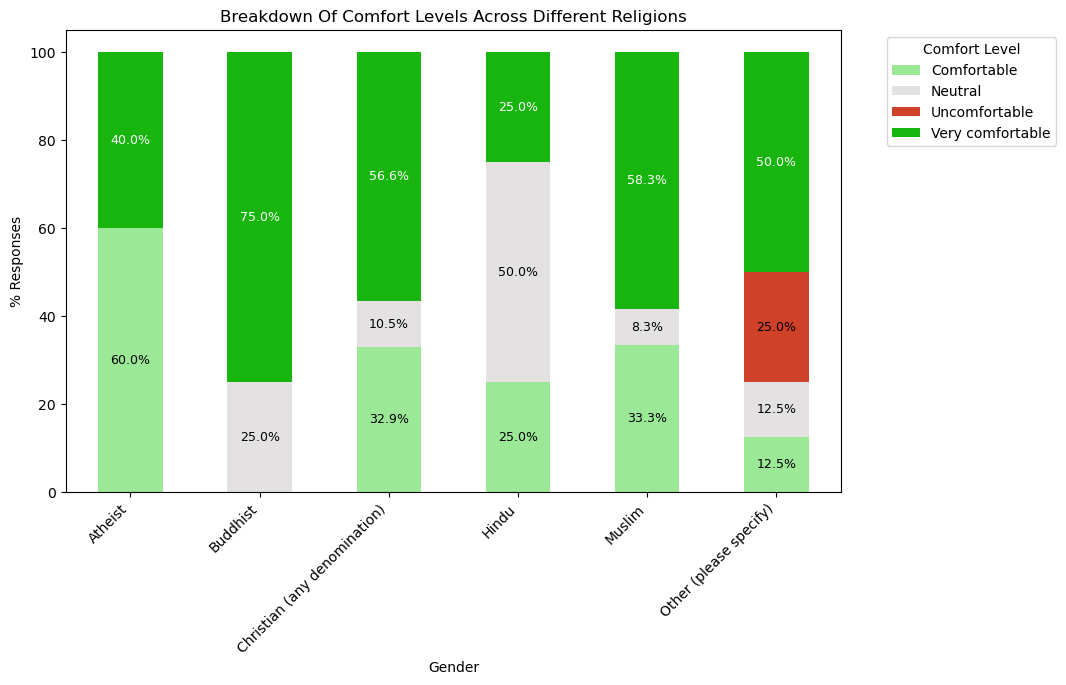

In [87]:
plot_bar(
    df= survey, 
    category_col= 'What religious affiliation are you?',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Different Religions',
    xlabel='Gender',
    ylabel='% Responses',
)

In [86]:
survey[survey['What religious affiliation are you?']=='Other (please specify)'][['Religion_other','How comfortable do you feel interacting with Muslims in your community?']]

,Religion_other,How comfortable do you feel interacting with Muslims in your community?
15,Agnostic,Very comfortable
42,None,Neutral
62,R,Uncomfortable
80,Mormon,Uncomfortable
89,ok,Very comfortable
99,Wiccan/Pagan,Very comfortable
102,Inclusionist,Very comfortable
106,Agnostic,Comfortable


## Observation 10

The data highlights varying comfort levels across religious groups, with Atheists and Muslims showing the highest levels of comfort around Muslims. Hindus exhibit the most neutral sentiment, while the 'Other' group is the only religious category reporting any level of discomfort, suggesting that certain minority or less commonly represented groups may have unique perspectives. 

Overall, the majority of respondents in most groups express a sense of comfort in relation to Muslims

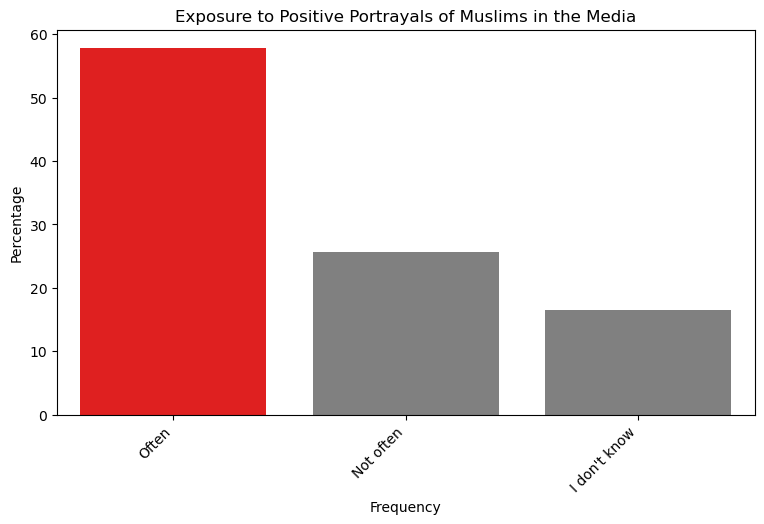

In [93]:
plot_percentages(survey, 'How often do you hear positive things about Muslims in the media?', 'Frequency',\
                  'Exposure to Positive Portrayals of Muslims in the Media' )

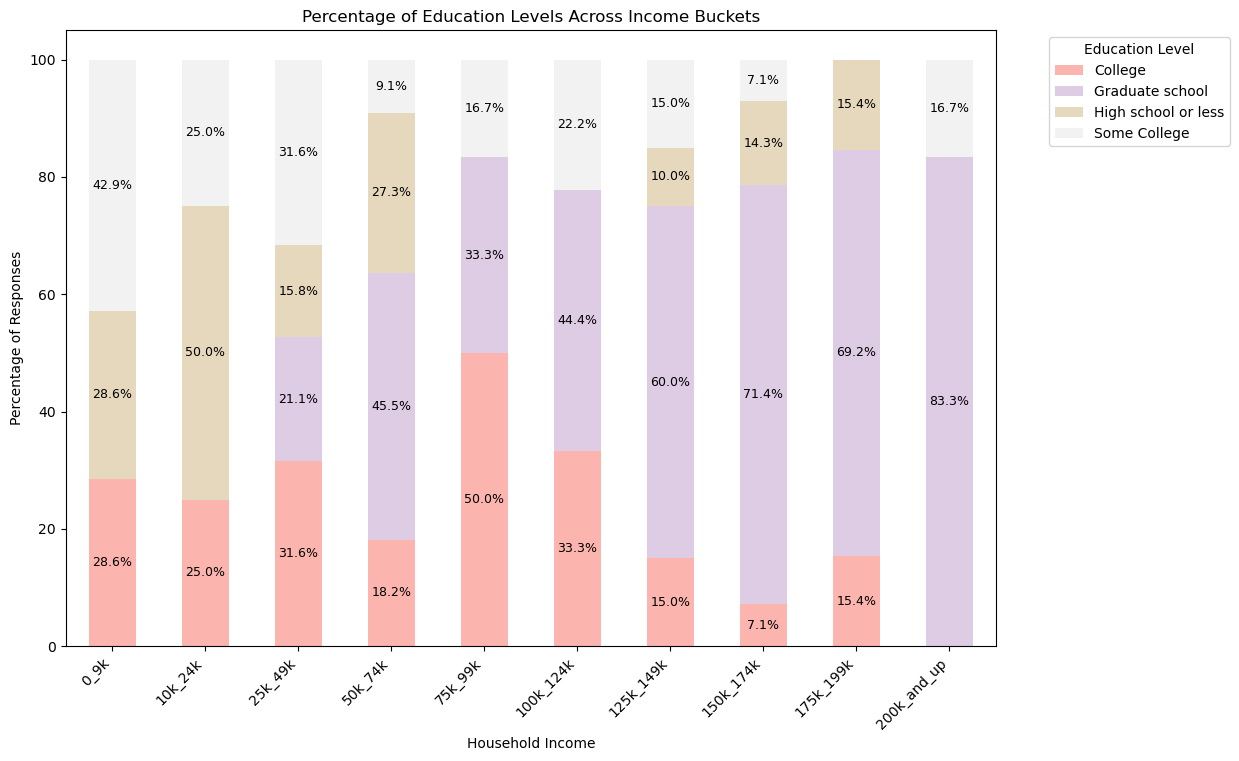

In [134]:

income_order = ['0_9k', '10k_24k', '25k_49k', '50k_74k', '75k_99k', '100k_124k', '125k_149k', '150k_174k', \
                '175k_199k', '200k_and_up']

survey['Household Income'] = pd.Categorical(survey['Household Income'], categories=income_order, ordered=True)
income_education_counts = survey.groupby(['Household Income', 'What is your level of education?']).\
size().unstack().fillna(0)

income_education_percentage = income_education_counts.div(income_education_counts.sum(axis=1), axis=0) * 100

ax = income_education_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Pastel1')

plt.title('Percentage of Education Levels Across Income Buckets')
plt.xlabel('Household Income')
plt.ylabel('Percentage of Responses')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')


for i, income in enumerate(income_education_percentage.index):
    cumulative_percentage = 0
    for education_level in income_education_percentage.columns:
        percentage = income_education_percentage.loc[income, education_level]
        if percentage > 0:
            ax.text(
                i, cumulative_percentage + (percentage / 2),  # Position in the middle of each segment
                f"{percentage:.1f}%", 
                ha='center', va='center', color='black', fontsize=9
            )
            cumulative_percentage += percentage

plt.show()
